In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data1.txt'
#header=None时，即指明原始文件数据没有列索引，这样read_csv会自动加上列索引，除非你给定列索引的名字。
data = pd.read_csv(path, header = None , names=['Exam1','Exam2','Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [4]:
result = sigmoid(1)
result

0.7310585786300049

## 绘制散点图，颜色编码可视化

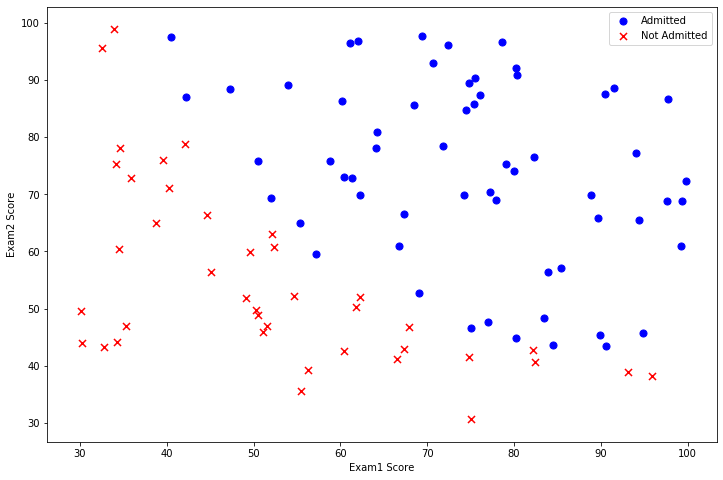

In [5]:
#首先首先将数据集分类，合格的为正，不合格的为负
positive = data[data['Admitted'].isin([1])]#返回值满足，{Admitted列含有数值[1]}
negative = data[data['Admitted'].isin([0])]

#fig是画布 ，axes是画布上的坐标轴
#figsize是画布大小
fig , axes = plt.subplots(figsize=(12,8))
# x=positive['Exam1'] y=positive['Exam2'] 
#s：指定散点的大小
#marker：指定散点的图形样式
axes.scatter(positive['Exam1'] , positive['Exam2'] , s=50 , c='b' , marker = 'o', label='Admitted')
axes.scatter(negative['Exam1'] , negative['Exam2'] , s=50 ,c='r' , marker='x' , label='Not Admitted')
axes.legend()#设置图例，见收藏
axes.set_xlabel('Exam1 Score')
axes.set_ylabel('Exam2 Score')
plt.show()

## 测试sigmoid

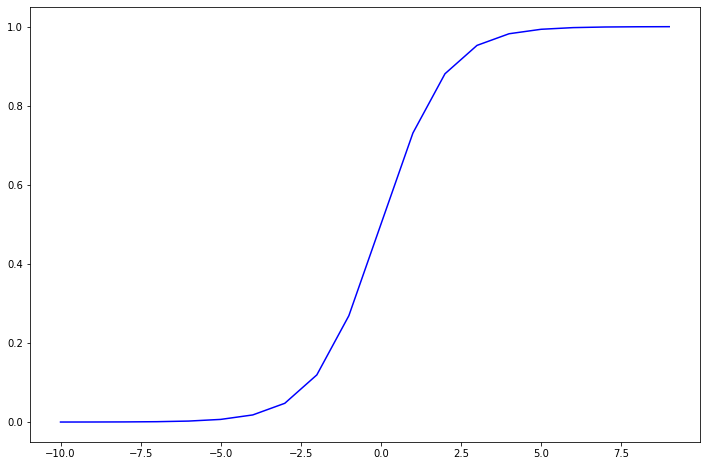

In [6]:
nums = np.arange(-10 , 10 ,step=1)
plt.subplots(figsize=(12,8))
plt.plot(nums ,sigmoid(nums) , 'b')#plt.plot本质上还是在axes上画图
plt.show()

## 成本函数

In [7]:
def cost(theta, X ,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(y, np.log(sigmoid(X*theta.T)))
    second = np.multiply( (1-y) , np.log(1-sigmoid(X*theta.T)))
    return np.sum(-first-second) / len(X)

In [8]:
data.insert(0 ,'One',1 )
cols = data.shape[1] 
X=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)#为什么初始值设置为0数组？

In [9]:
theta

array([0., 0., 0.])

In [10]:
X.shape , theta.shape , y.shape
#注意

((100, 3), (3,), (100, 1))

In [11]:
cost(theta ,X ,y)

0.6931471805599453

# 计算梯度下降

In [12]:
#这只是计算梯度
def gradient(theta ,X , y ):#位置对应就可以
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X*theta.T)-y
    
    for i in range(parameters):
        term = np.multiply(error , X[: , i])
        grad[i] = np.sum(term)/len(X)
    return grad

In [13]:
gradient(theta ,X ,y)#这只是计算了在theta（0,0,0）时一个梯度步长的计算

array([ -0.1       , -12.00921659, -11.26284221])

#### 在用python实现逻辑回归和线性回归时，使用梯度下降法最小化cost function，用到了fmin_tnc()
**参数：**

func：优化的目标函数 

x0：初值

fprime：提供优化函数func的梯度函数

args：元组，是传递给优化函数的参数

**返回：**

x ： 数组，返回的优化问题目标值

nfeval ： 整数，目标优化函数被调用的次数

rc ： 整数

In [14]:
import scipy.optimize as opt
#如果优化函数和梯度函数中的参数顺序不是theta ,X ,y 会报错，具体原因不明白
result = opt.fmin_tnc(func=cost, x0=theta.T ,fprime=gradient, args=(X, y))
result

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

In [15]:
cost(result[0], X, y)
#result[0]也就是theta

0.20349770158947425

In [16]:
def predict(theta , X):
    probability = sigmoid(X*theta.T) 
    [ 1 if x>=0.5  else 0 for x in probability]
    return [ 1 if x>=0.5  else 0 for x in probability]#返回的是列表



    map函数的原型是map(function, iterable, …)，它的返回结果是一个列表。
        参数function传的是一个函数名，可以是python内置的，也可以是自定义的。
        参数iterable传的是一个可以迭代的对象，例如列表，元组，字符串这样的。

    == 注意：是函数名，不是调用函数，不需要加（）==


In [17]:
theta_min = np.matrix(result[0])#此时theta_min是矩阵
predictions = predict(theta_min , X)#是一个列表，只包含 0和1
#此时probability是一个（100,1）的矩阵
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
#zip将predictions, y打包成为一个组元[ (a1,b1) ,(a2 ,b2)....] 
#correct是列表，将每一个数转为int类型
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


In [18]:
#z注意矩阵和数组的 * 是不同的
#数组的 * 是对应位置相乘 ，与multiply效果一致， 如果需要进行矩阵乘法运算需要使用  .dot
#X*result[0].T #100*3 array( [ [ , ,] , [ , ,] ... [ , ,] ] )
# 矩阵的 * 就是 乘法运算， （100 ， 3）  * （ 3 ，1） = （100 ，1）
#X*theta_min.T  # matrix（[ [], [].. [] ]）100*1


In [19]:
path = 'ex2data2.txt'
data2 = pd.read_csv(path , header =None  , names=['Test 1','Test 2' , 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [20]:
postive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

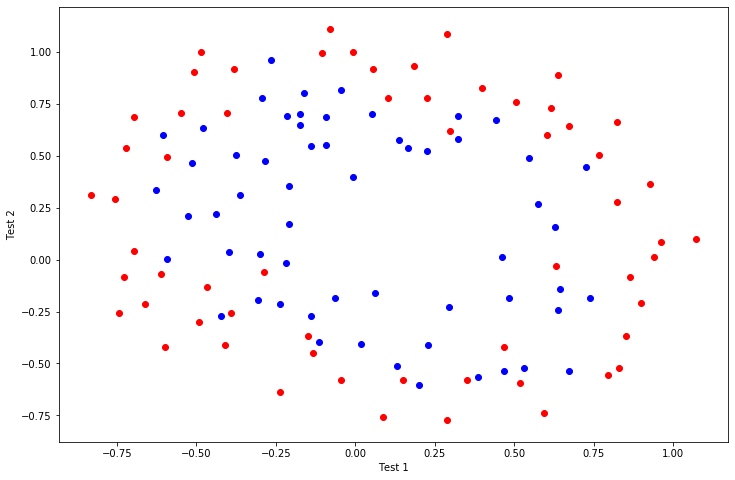

In [21]:
#建坐标图
plt.figure(figsize=(12,8))
plt.xlabel('Test 1')
plt.ylabel('Test 2')
#画分散点
#画postive
pos_x = postive['Test 1']
pos_y = postive['Test 2']
pos_x = pos_x.values
pos_y = pos_y.values
plt.scatter(pos_x , pos_y ,c='b')
neg_x = negative['Test 1']
neg_y = negative['Test 2']
plt.scatter(neg_x , neg_y ,c='r')

In [22]:
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [23]:
def costFunction(theta , X ,y , learnRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    frist = np.multiply(-y , np.log(sigmoid(X * theta.T)))
    second = np.multiply(1-y , np.log(1-sigmoid(X * theta.T)) )
    #为什么刚开始写theta[: , 0:theta.shape[1]-1]结果也一样，因为这个theta全是0
    p = np.multiply(theta[: , 1:theta.shape[1]-1] , theta[: , 1:theta.shape[1]-1] )
    result = np.sum(frist - second)/len(X) + learnRate * np.sum(p)/ (2 * len(X))
    return result

np.zeros(2) 
-------->array([0., 0.]) 
np.zeros((2,2),dtype = 'int') 
-------->array([[0, 0],[0, 0]])

In [24]:
cols =  data2.shape[1]
theta = np.zeros(cols -1)#个指定形状的数组，其元素为0的指定type
X = data2.iloc[: , 1:cols ]
y= data2.iloc[: , 0:1 ]
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
X = X.values
X

array([[ 1.00000000e+00,  5.12670000e-02,  2.62830529e-03, ...,
         9.42624411e-05,  1.28625106e-03,  1.75514423e-02],
       [ 1.00000000e+00, -9.27420000e-02,  8.60107856e-03, ...,
        -5.46363780e-04,  4.03513411e-03, -2.98012201e-02],
       [ 1.00000000e+00, -2.13710000e-01,  4.56719641e-02, ...,
        -6.75674451e-03,  2.18864648e-02, -7.08946949e-02],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  2.34691802e-01, ...,
        -1.13613445e-01,  2.34349278e-01, -4.83389829e-01],
       [ 1.00000000e+00, -6.33640000e-03,  4.01499650e-05, ...,
        -2.54220521e-07,  4.00913674e-05, -6.32253341e-03],
       [ 1.00000000e+00,  6.32650000e-01,  4.00246023e-01, ...,
        -7.75143736e-03,  3.75068364e-04, -1.81484119e-05]])

In [26]:
y=y.values

In [27]:
costFunction(theta ,X ,y ,1)

0.6931471805599454

In [28]:
def gradient(theta ,X ,y ,learnRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameter = X.shape[1]
    grad = np.zeros(parameter)
    #别把代价函数和h(X)弄混了
    #frist = np.multiply(-y , np.log(sigmoid(X * theta.T)))
    #second = np.multiply(1-y , np.log(1-sigmoid(X * theta.T)) )
    error = sigmoid(X*theta.T) - y
    for i in range(parameter):
        if(i==0):
            grad[i] = np.sum(error)/len(X)#x0=1
        else:
            grad[i] =np.sum( np.multiply(error, X[: , i]) ) /len(X) + (learnRate*theta[:,i])/len(X)
            
    return grad  
    
    

In [29]:
gradient(theta ,X ,y ,1)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

In [31]:
result= opt.fmin_tnc(func = costFunction , x0= theta , fprime = gradient , args=(X ,y ,1))
result

(array([ 0.53011247,  0.29073789, -1.60729614, -0.58208423,  0.01774239,
        -0.21341515, -0.40013918, -1.37139   ,  0.02264086, -0.9503256 ,
         0.03447118]),
 43,
 4)

In [32]:
costFunction(result[0] ,X ,y ,1)

0.6226774040934294

In [33]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 78%
